<a href="https://colab.research.google.com/github/mrayushman/Cyber-Bullying-Detection-using-ML/blob/main/CyberBullyingDetectionUsingMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", -1)
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import nltk
nltk.download("stopwords")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
url = 'https://raw.githubusercontent.com/adwait1291/Cyber-Bullying-Detection-Using-ML-Algorithims/main/Dataset/Suspicious%20Communication%20on%20Social%20Platforms.csv'
df = pd.read_csv(url)
df.head()

,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook Rengel the Dems are so fucking corrupt it's a joke. Make Republicans look like ...,1
2,why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here.,1
3,Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.,1
4,WTF are you talking about Men? No men thats not a menage that's just gay.,1


In [3]:
df.shape

(20001, 2)

In [4]:
df.info

<bound method DataFrame.info of                                                                                                                                  comments  \
0       Get fucking real dude.                                                                                                              
1       She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ...   
2       why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here.   
3       Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.       
4       WTF are you talking about Men? No men thats not a menage  that's just gay.                                                          
...                                                                            ...                                        

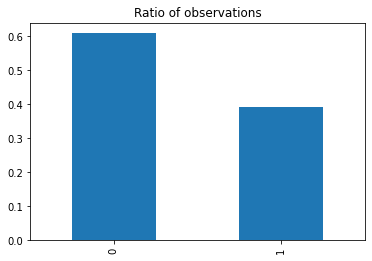

In [5]:
df['tagging'].value_counts(normalize=True).plot(kind='bar', title='Ratio of observations')


In [6]:
#Function to tokenize the text and remove punctuations
import string
def tokenize_remove_punctuations(text):
    clean_text = []
    text = text.split(" ")
    for word in text:
        word = list(word)
        new_word = []
        for c in word:
            if c not in string.punctuation:
                new_word.append(c)
        word = "".join(new_word)
        if len(word)>0:
            clean_text.append(word)
    return clean_text

In [7]:
trial_text = "hello @anyone reading? wt is the name of am in that this  ??!@"
trial_text = tokenize_remove_punctuations(trial_text)
print(trial_text)

['hello', 'anyone', 'reading', 'wt', 'is', 'the', 'name', 'of', 'am', 'in', 'that', 'this']


In [12]:
#Function to remove english stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text = []
    for word in text:
        if word not in stopwords:
            clean_text.append(word)
    return clean_text

In [13]:
trial_text = remove_stopwords(trial_text)
print(trial_text)

['hello', 'anyone', 'reading', 'wt', 'name']


In [14]:
#Part Of Speech Tagging
def pos_tagging(text):
    tagged = nltk.pos_tag(text)
    return tagged 

In [16]:
nltk.download('averaged_perceptron_tagger')
pos_tag = pos_tagging(trial_text)
print(pos_tag)

[('hello', 'NN'), ('anyone', 'NN'), ('reading', 'VBG'), ('wt', 'NNS'), ('name', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Function to get wordnet tagging for POS
from nltk.corpus import wordnet
def get_wordnet(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [18]:
#Function to lemmatize words
from nltk.stem import WordNetLemmatizer
def lemmatize(pos_tags):
    lemmatized_text = []
    for t in pos_tags:
        word = WordNetLemmatizer().lemmatize(t[0],get_wordnet(t[1]))
        lemmatized_text.append(word)
    return lemmatized_text

In [19]:
def clean_text(text):
    text = str(text)
    #Converting text to lower-case
    text = text.lower()
    #Tokenize and remove punctuations from the text
    text = tokenize_remove_punctuations(text)
    #Remove words containing numericals
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #Remove stopwords
    text = remove_stopwords(text)
    #Remove empty tokens
    text = [ t for t in text if len(t) > 0]
    #POS tagging
    pos_tags = pos_tagging(text)
    #Lemmatize text
    text = lemmatize(pos_tags)
    #Remove words with only one letter
    text = [ t for t in text if len(t)>1]
    #Join all words
    text = " ".join(text)
    return text

In [23]:
nltk.download('wordnet')
nltk.download('omw-1.4')
print(clean_text("What is y0ur names? THis is a cat!! 12?"))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


name cat


In [25]:

print(clean_text("Are you going to zoo?"))



go zoo


In [26]:
df['Processed_Comment'] = df['comments'].map(clean_text)

#Splitting dataset for training and testing(80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Comment'], 
                                                    df['tagging'], 
                                                    random_state=42,test_size=0.20)


In [27]:
#Using CountVectorizer to get feature vectors
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
X_test = count_vector.transform(X_test)

In [28]:
len(count_vector.vocabulary_)


13816

In [29]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [30]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [32]:
#Using GridSearchCV to find best parameters
model_params = {
    'LinearSVC': {
        'model': LinearSVC(max_iter=1000000,random_state=42),
        'params' : {
            'C': [0.1,1,5,10,20],
        }  
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(random_state=42, multi_class='ovr',max_iter=1000000),
        'params': {
            'C': [1,5,10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(p=2 ),
        'params' : {
            'n_neighbors': [5,9,11,23],
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
        }
    }
}


In [33]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
params = pd.DataFrame(scores,columns=['model','best_score','best_params'])
params

,model,best_score,best_params
0,LinearSVC,0.830562,{'C': 1}
1,MultinomialNB,0.765375,"{'alpha': 0.5, 'fit_prior': True}"
2,logistic_regression,0.832250,"{'C': 10, 'solver': 'lbfgs'}"
3,KNeighborsClassifier,0.782563,"{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'distance'}"


In [34]:
results =[]

In [35]:
model1= KNeighborsClassifier(n_neighbors=23, metric='euclidean',weights = 'distance')  
model1.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=23, weights='distance')

In [36]:
predictions_test = model1.predict(X_test)
predictions_train = model1.predict(X_train)
temp = ['KNeighborsClassifier']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
results.append(temp)

In [37]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1678   80]
 [ 746 1497]]


In [39]:
#Logistic Regression
model2 = LogisticRegression(C=10, random_state=42, solver='lbfgs', multi_class='ovr',max_iter=1000000)
model2.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000000, multi_class='ovr', random_state=42)

In [40]:
predictions_test = model2.predict(X_test)
predictions_train = model2.predict(X_train)
temp = ['LogisticRegression']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
results.append(temp)

In [41]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1983  163]
 [ 441 1414]]


In [42]:
#Naive Bayes
model3 = MultinomialNB(alpha = 0.5, fit_prior = 'True')
model3.fit(X_train, y_train)

MultinomialNB(alpha=0.5, fit_prior='True')

In [43]:
predictions_test = model3.predict(X_test)
predictions_train = model3.predict(X_train)
temp = ['MultinomialNB']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
results.append(temp)

In [44]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1986  370]
 [ 438 1207]]


In [45]:
#Linear SVC
model4 = LinearSVC(C = 1, max_iter=1000000,random_state=42)
model4.fit(X_train, y_train)

LinearSVC(C=1, max_iter=1000000, random_state=42)

In [46]:
predictions_test = model4.predict(X_test)
predictions_train = model4.predict(X_train)
temp = ['LinearSVC']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
results.append(temp)

In [47]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1967  162]
 [ 457 1415]]


In [48]:
#Summary

In [49]:
results = pd.DataFrame(results, columns = ['Algorithm','Accuracy Score : Train', 'Recall Score : Train','F1-Score :Train','Precision Score :Train','Accuracy Score : Test', 'Recall Score : Test','F1-Score : Test','Precision Score : Test'])
results

,Algorithm,Accuracy Score : Train,Recall Score : Train,F1-Score :Train,Precision Score :Train,Accuracy Score : Test,Recall Score : Test,F1-Score : Test,Precision Score : Test
0,KNeighborsClassifier,0.993625,0.989482,0.991853,0.994235,0.793552,0.667410,0.783770,0.949271
1,LogisticRegression,0.964187,0.956683,0.953994,0.951321,0.849038,0.762264,0.824009,0.896639
2,MultinomialNB,0.893938,0.873767,0.862357,0.851241,0.798050,0.733739,0.749224,0.765377
3,LinearSVC,0.963938,0.954750,0.953755,0.952762,0.845289,0.755876,0.820528,0.897273


In [50]:
#Saving Models and Pickle Files

In [51]:
import pickle


pickle_out = open("vectorizer.pkl","wb")
pickle.dump(count_vector, pickle_out)
pickle_out.close()

pickle_out = open("LinearSVC.pkl","wb")
pickle.dump(model4, pickle_out)
pickle_out.close()

pickle_out = open("MultinomialNB.pkl","wb")
pickle.dump(model3, pickle_out)
pickle_out.close()

pickle_out = open("LogisticRegression.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

pickle_out = open("KNeighborsClassifier.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()